In [145]:
import dhlab.nbtext as nb

In [53]:
import pandas as pd

In [5]:
from dhlab.nbtokenizer import tokenize

In [8]:
from collections import Counter

In [29]:
def analyse(fname):
    with open(fname, encoding = 'utf-8') as f:
        txt = f.read()

    toks = tokenize(txt)
    bigrams =  [' '.join(toks[i:i+2]) for i in range(len(toks))]
    
    return Counter(bigrams), Counter(toks) 

In [40]:
def skips(fname, words):
    with open(fname, encoding = 'utf-8') as f:
        txt = f.read()
    toks = [w for w in tokenize(txt) if w in words]
    skipgrams =  [' '.join(toks[i:i+2]) for i in range(len(toks))]
    return Counter(skipgrams)

In [35]:
def top(c, n = 50):
    return list(dict(c.most_common(50)).keys())

In [247]:
def books(author):
    c =  nb.book_corpus(author = author, ddk = "83%", limit = 50, lang='nob').sort_values(by='year').drop_duplicates(subset = ['title'], keep = 'last')
    return  pd.concat([nb.frame(nb.get_freq(x[1].urn, 0, 0), '-'.join([str(x[1].urn),x[1].title])) for x in c.iterrows()], axis = 1)

In [229]:
check_ratio = lambda i,j, df = unigrams: (df.loc[i].sum()/df.loc[j].sum()).round(2)

In [28]:
sb, sf = analyse('sykesøster.txt')
hb, hv = analyse('havørn.txt')
kb, kv = analyse('kaninanda.txt')
gb, gv = analyse('gaupa.txt')

In [43]:
s = set(top(sf, 100)) & set(top(hv, 100)) & set(top(kv, 100)) & set(top(gv, 100))

In [47]:
ss = skips('sykesøster.txt', s)
hs = skips('havørn.txt', s)
ks = skips('kaninanda.txt', s)
gs = skips('gaupa.txt', s)

In [61]:
skipgrams = pd.DataFrame( {'sykesøster': ss, 'havørn':hs, 'kaninanda': ks, 'gaupa':gs})

In [66]:
bigrams = pd.DataFrame( {'sykesøster': sb, 'havørn':hb, 'kaninanda': kb, 'gaupa':gb})

In [65]:
unigrams = pd.DataFrame( {'sykesøster': sf, 'havørn':hv, 'kaninanda': kv, 'gaupa':gv})

In [155]:
unigrams.loc["han hun ho jeg eg".split()]

,sykesøster,havørn,kaninanda,gaupa,pedersen
han,14.0,78.0,115.0,8.0,738.0
hun,NaN,59.0,30.0,49.0,691.0
ho,63.0,NaN,NaN,NaN,NaN
jeg,NaN,14.0,2.0,121.0,1824.0
eg,128.0,NaN,NaN,NaN,NaN


In [200]:
(unigrams.loc['eg jeg Eg Jeg han Han'.split()].sum()/unigrams.loc['hun Hun ho Ho'.split()].sum()).round(2)

sykesøster    2.66
havørn        1.51
kaninanda     4.03
gaupa         3.63
pedersen      3.58
uri           2.00
dtype: float64

In [201]:
(unigrams.loc['han Han'.split()].sum()/unigrams.loc['hun Hun ho Ho'.split()].sum()).round(2)

sykesøster    0.23
havørn        1.17
kaninanda     3.97
gaupa         0.21
pedersen      1.00
uri           1.73
dtype: float64

In [230]:
check_ratio('det den Det Den'.split(),  'denne dette Denne Dette'.split())

sykesøster     6.10
havørn        24.20
kaninanda     21.00
gaupa          9.73
pedersen       6.21
uri            9.40
dtype: float64

In [279]:
check_ratio('den'.split(),  'denne'.split())

sykesøster     3.00
havørn         7.50
kaninanda     10.00
gaupa          3.67
pedersen       3.65
uri            7.58
dtype: float64

In [198]:
check_ratio('.'.split(),  ','.split())

sykesøster    1.02
havørn        0.63
kaninanda     0.51
gaupa         1.61
pedersen      0.44
uri           0.66
dtype: float64

In [231]:
check_ratio('den'.split(),  'denne'.split())

sykesøster     3.00
havørn         7.50
kaninanda     10.00
gaupa          3.67
pedersen       3.65
uri            7.58
dtype: float64

In [232]:
check_ratio('vel kanskje'.split(), 'sånn sikkert jo'.split())

sykesøster    0.36
havørn        1.00
kaninanda     0.60
gaupa         0.29
pedersen      0.48
uri           0.62
dtype: float64

In [233]:
(unigrams.loc[',']/unigrams.loc['.']).round(2)

sykesøster    0.99
havørn        1.59
kaninanda     1.97
gaupa         0.62
pedersen      2.26
uri           1.51
dtype: float64

In [92]:
skipgrams.sort_values(by='kaninanda', ascending=False).head(20)


,sykesøster,havørn,kaninanda,gaupa
", og",45.0,64.0,38.0,23.0
", ,",68.0,111.0,24.0,34.0
det var,7.0,11.0,23.0,12.0
i .,48.0,23.0,19.0,35.0
", for",8.0,1.0,19.0,6.0
"for ,",10.0,1.0,17.0,6.0
"var ,",8.0,13.0,16.0,5.0
", det",32.0,29.0,15.0,14.0
". ,",64.0,86.0,14.0,32.0
og det,3.0,6.0,14.0,8.0


In [93]:
bigrams.sort_values(by='kaninanda', ascending=False).head(20)


,sykesøster,havørn,kaninanda,gaupa
", men",8.0,21.0,34.0,10.0
", og",27.0,34.0,26.0,17.0
det var,7.0,9.0,20.0,10.0
", for",4.0,NaN,16.0,3.0
at han,NaN,3.0,12.0,NaN
. Han,5.0,7.0,12.0,4.0
han ikke,NaN,NaN,11.0,NaN
var det,9.0,5.0,9.0,6.0
at det,5.0,2.0,9.0,7.0
og det,1.0,2.0,8.0,5.0


In [81]:
unigrams.sort_values(by='gaupa', ascending=False).head(10)

,sykesøster,havørn,kaninanda,gaupa
.,336.0,289.0,99.0,312.0
",",331.0,459.0,195.0,194.0
jeg,NaN,14.0,2.0,121.0
Jeg,NaN,14.0,NaN,112.0
i,115.0,78.0,67.0,91.0
og,130.0,136.0,99.0,87.0
det,111.0,75.0,78.0,85.0
en,NaN,32.0,51.0,79.0
meg,52.0,4.0,NaN,76.0
på,71.0,105.0,48.0,63.0


In [243]:
solstad = nb.book_corpus(author = 'Solsta%dag%', ddk = "83%", limit = 50, lang = 'nob').sort_values(by='year').drop_duplicates(subset = ['title'], keep = 'last')

In [244]:
uri = nb.book_corpus(author = 'uri%hele%', ddk = "83%", limit = 50, lang='nob').sort_values(by='year').drop_duplicates(subset = ['title'], keep = 'last')

In [246]:
jacobsen = books('jacobsen%roy%')

In [151]:
pedersen = nb.frame(nb.get_freq(2009021004009, top = 0, cutoff = 0), 'freq')

In [195]:
uri = nb.frame(nb.get_freq(2011101408121, top = 0, cutoff = 0), 'freq')

In [154]:
unigrams['pedersen'] = pedersen.freq

In [196]:
unigrams['uri'] = uri.freq

In [168]:
(unigrams[unigrams.index.str.contains('ing')].sum()/unigrams.sum()).round(4)*100

sykesøster    0.60
havørn        0.58
kaninanda     0.93
gaupa         0.94
pedersen      0.34
dtype: float64

In [180]:
(unigrams[unigrams.index.str.contains('.*ingen$')].sum()/unigrams[unigrams.index.str.contains('.*ingane$')].sum()).round(4)

sykesøster    inf
havørn        inf
kaninanda     inf
gaupa         inf
pedersen      inf
dtype: float64

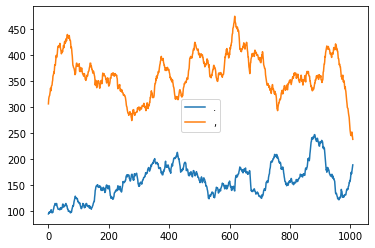

In [183]:
nb.plot_book_wordbags(2009021004009, [['.'],[',']]).plot()

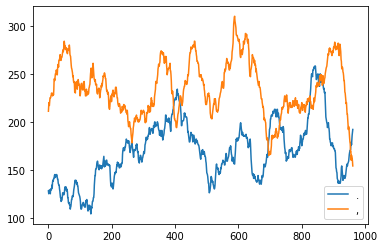

In [186]:
nb.plot_book_wordbags(2011030822002, [['.'],[',']]).plot()

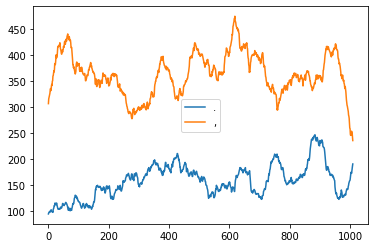

In [188]:
nb.plot_book_wordbags(2011051920009, [['.'],[',']]).plot()

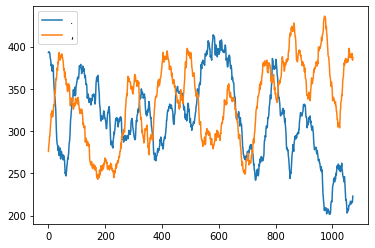

In [185]:
nb.plot_book_wordbags(2011041205014, [['.'],[',']]).plot()

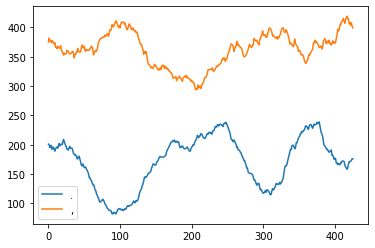

In [189]:
nb.plot_book_wordbags(2011050920008, [['.'],[',']]).plot()

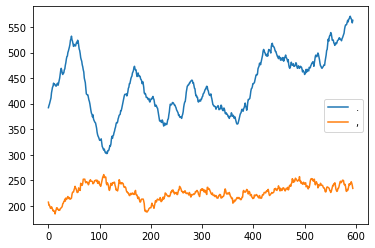

In [192]:
nb.plot_book_wordbags(2012121408044, [['.'],[',']]).plot()

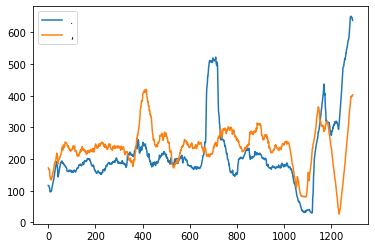

In [193]:
nb.plot_book_wordbags(2008071704056, [['.'],[',']]).plot()

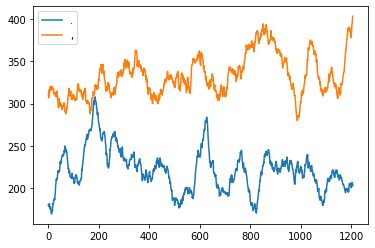

In [194]:
nb.plot_book_wordbags(2011101408121, [['.'],[',']]).plot()

In [222]:
uri

,urn,author,title,year
16,2009060900033,"Uri, Helene",Dråpen som fikk alt til å skje,2003
5,2011071208188,"Uri, Helene",Anna på fredag,2007
14,2013021207062,"Uri, Helene",Mamma morgenheks,2008
9,2014072808125,"Uri, Helene",De beste blant oss,2010
8,2014070305039,"Uri, Helene",Honningtunger,2010
6,2012112808039,"Uri, Helene",rettferdige,2010
1,2012121408044,"Uri, Helene",Dyp rød 315,2010
12,2014070105102,"Uri, Helene",Engel av nylon,2010
18,2014061706080,"Uri, Helene",Kjerringer,2011


In [257]:
uri_corpus = books('uri%hele%')

In [258]:
solstad_corpus = books('solstad%dag%')

In [248]:
jacobsen_corpus = books('jacobsen%roy%')

In [267]:
ragde_corpus = books('ragde%anne%')

In [268]:
hiort_corpus = books('hjort%vigdis%')

In [276]:
fosnes_corpus = books('%hansen%erik%')

In [280]:
check_ratio(['den'], ['denne'], uri_corpus)

2009060900033-Dråpen som fikk alt til å skje    16.33
2011071208188-Anna på fredag                    15.71
2013021207062-Mamma morgenheks                   8.80
2012112808039-rettferdige                        8.33
2012121408044-Dyp rød 315                       12.67
2014070105102-Engel av nylon                    12.67
2014072808125-De beste blant oss                 7.58
2014070305039-Honningtunger                     14.92
2014061706080-Kjerringer                         9.76
dtype: float64

In [269]:
check_ratio(['den'], ['denne'], ragde_corpus).describe()

count    32.0000
mean         inf
std          NaN
min       5.8900
25%       8.6850
50%      13.5450
75%      17.5525
max          inf
dtype: float64

In [278]:
check_ratio(['den'], ['denne'], fosnes_corpus)

2011032406075-Brevduen                      51.38
2008071404093-Salme ved reisens slutt        5.79
2012121006001-Løvekvinnen                    6.32
2013032106148-Beretninger om beskyttelse     7.84
2013071806137-Falketårnet                    7.40
dtype: float64

In [272]:
check_ratio(['den'], ['denne'], hiort_corpus)

2014070705108-Pelle-Ragnar i den gule gården        16.40
2013040807034-Råtne Rikard                            inf
2012062806027-Drama med Hilde                        5.79
2008060904065-Gjennom skogen                        29.20
2009051404036-dikt til mormor                       78.67
2008062600015-Fransk åpning                         20.78
2008012404034-Tungekysset ; og Drømmen              45.00
2013111908004-På hjørnet om kvelden                 25.00
2008021304083-Ubehaget i kulturen                    6.22
2008072204021-Død sheriff                           20.36
2009042004056-Hysj                                  29.00
2008090204060-første gangen                          5.83
2011032508155-17.15 til Tønsberg                     8.24
2012071206008-Mor betaler!                           4.75
2011100408202-Fordeler og ulemper ved å være til    15.62
2014012906003-Hjulskift                              7.83
2014051306007-Tredje person entall                  16.29
2013040906028-

In [273]:
check_ratio(['den'], ['denne'], ragde_corpus)

2007082100039-hemmelig kjempeidé                                       17.71
2007091701093-Noen kommer noen går                                      5.89
2016020807594-Kristin og Håkon og villsporet i vinterskogen              inf
2008012201012-Hundegalskap!                                             6.06
2008022100013-Valpefabrikken                                            7.44
2008080800075-Ansiktet som solen                                       13.07
2008071600096-På kloss hold                                            11.06
2008082500063-Jeg vinket ikke, jeg druknet                              7.12
2013032006010-Svanhild Olsens elegante musefangeri                     17.50
2013121008186-Laksen og løgnhalsen                                      7.00
2011090606045-Harehjerte                                               15.00
2011081708066-"Dumme mamma!"                                             inf
2014062505056-Ikke gi meg mat!                                         24.50

In [281]:
check_ratio(['den'], ['denne'], solstad_corpus)

2011020923006-Spiraler                                                                                       11.00
2011020923001-Arild Asnes, 1970                                                                               5.56
2008052904049-Tilbake til Pelle Erobreren?                                                                    6.18
2008052600052-Krig 1940                                                                                       5.16
2011030820006-Spiraler ; Svingstol                                                                           12.70
2007112704079-"Ellevte roman, bok atten"                                                                      3.53
2008070804084-Irr! Grønt!                                                                                     9.43
2011051020003-Arild Asnes 1970                                                                                5.56
2011040706077-Medaljens forside                                                 

In [282]:
check_ratio(['den'], ['denne'], jacobsen_corpus)

2007082104052-Det kan komme noen     9.72
2010110908095-Tommy                 13.39
2007081004045-Fangeliv              11.20
2010110808153-Ursula                15.36
2010121406046-Virgo                  9.50
2013121008220-Fata morgana           3.99
2009012200019-Fugler og soldater     5.36
2014052108045-Det nye vinduet        8.10
2014090908205-Hoggerne               5.88
2012041108073-Vidunderbarn           8.21
2014101408132-Seierherrene           6.97
2013041506009-Ismael                 4.30
2013032005000-Frost                  6.01
2015052608113-Marions slør           4.86
2014060208018-Det nye vannet         9.56
2014021908158-Grenser                6.21
2014061205105-høyre armen            5.85
2013102505034-Anger                  7.62
2012120408027-Hjertetrøbbel          7.21
dtype: float64